In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Equities', 'Foreign') + ['VT', 'ACWI'], 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-20 to 2019-07-05 - 77


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

75


,len,mean,std,shrp,drawdown
Symbols,,,,,
RSX,28,1.856718,1.293302,1.404958,1.428578
DGS,28,1.562077,1.167014,1.304521,1.564875
FNDE,28,1.524098,1.342014,1.106110,1.628895
PXH,28,1.386906,1.272535,1.058692,1.933044
SPEM,28,1.371375,1.271190,1.047595,1.761361
DEM,28,1.356456,1.266790,1.039457,1.390476
SCHE,28,1.382553,1.351266,0.993786,2.097089
VWO,28,1.377904,1.366401,0.979377,2.207297
EEMV,28,1.087143,1.086025,0.964490,1.317820


evicted INDA 0.40845089978390076
evicted DLS 0.894262526133779
evicted EEMV 0.8713509023448036
evicted EWT 0.8923596810286505
evicted EWG 0.8722215228076318
evicted FXI 0.8945584461826508
evicted GEM 0.8710841689369968
evicted EWL 0.7577805974883707
evicted EWY 0.7386417055433498
evicted KWEB 0.7547779001788268
evicted EWH 0.6702525429801932
evicted ASHR 0.710663123823985
retry backlogs ['HEDJ', 'INTF', 'IDEV', 'FDT', 'ACWX', 'EZU', 'PXH', 'SPEM', 'FNDE', 'FNDC', 'RODM', 'JPIN', 'VGK', 'SCHF', 'EFV', 'TLTD', 'SCZ', 'EWA', 'DBEF', 'DEM', 'PXF', 'IXUS', 'GSIE', 'EFG', 'EWJ', 'GXC', 'EWU', 'SCHC', 'FNDF', 'EWC', 'IEMG', 'VWO', 'SPDW', 'VEA', 'VSS', 'IEUR', 'MCHI', 'IPAC', 'AIA', 'VPL', 'CWI', 'EEM', 'VT', 'VIGI', 'EFA', 'VXUS', 'FEZ', 'VEU', 'IDV', 'AAXJ', 'IEV', 'IEFA', 'EFAV', 'VYMI', 'SCHE', 'ILF', 'ACWI', 'HEFA', 'EPP'] at 0.905 - 1.668
evicted FNDE 0.8912365906905003
evicted AIA 0.835617801781149
evicted VIGI 0.9031273447951661
evicted EWC 0.8827820046297619
evicted EFAV 0.8774134636

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,28.0,1.696522,1.004249,0.107369,1.010546,1.575258,2.321323,3.796169,1.649829,1.285244
RSX,28.0,1.856718,1.293302,-0.126799,0.845214,1.988733,2.896898,4.199471,1.404958,1.428578
DGS,28.0,1.562077,1.167014,-0.831878,0.811355,1.476417,2.283306,3.808729,1.304521,1.564875
EWZ,28.0,2.491526,2.655505,-1.464949,0.630451,2.180104,4.441487,6.986220,0.923306,2.658856
DXJ,28.0,0.721789,1.834856,-2.577432,-0.580467,0.537848,1.555681,4.117778,0.371749,4.053224


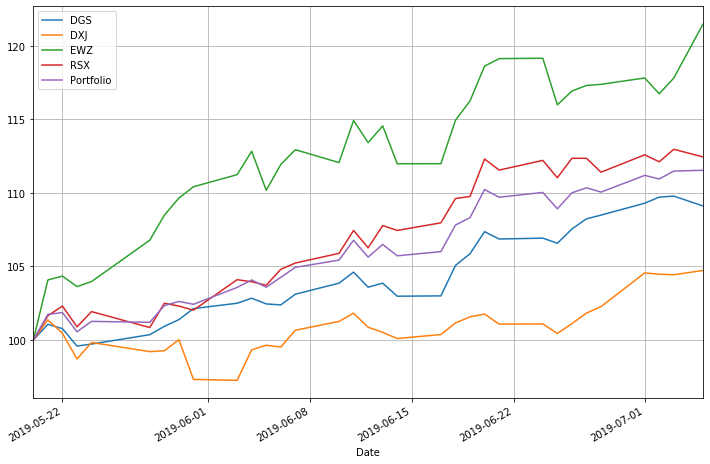

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)